<a href="https://colab.research.google.com/github/kastrahl/Assessments/blob/main/Trade_Reporting_data_Analysis_drop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
url = "https://raw.githubusercontent.com/malikjb35/pythonTest/main/Testdata.csv"
df = pd.read_csv(url)
print(df.head())

cols=['tradeId','regulator','version','assetClass','clDateTime','clStatus','cflag','eFlag','cDateTime','method','rate','expirationDate','eventT','mType','Timestamp','quantity','seller','endDate','sType','Product','price','terminationDate','party','PartyId','transactionType','Reporting Status']
df.columns=cols


   tradeId regulator  version assetClass                   clDateTime  \
0        1      SEBI        1         FX  2023-07-18T11:47:26.075000Z   
1        2      SEBI        9         FX  2023-08-02T03:12:48.207000Z   
2        3      SEBI        8         FX  2023-05-09T07:42:36.475000Z   
3        4      SEBI        1         FX  2023-10-01T05:02:54.209000Z   
4        5      SEBI        1         FX  2023-01-23T20:53:01.076000Z   

   clStatus   cflag  eFlag                    cDateTime         method  ...  \
0      True   FULLY  False  2023-12-10T07:37:58.548000Z  NonElectronic  ...   
1     False   FULLY  False  2023-10-03T22:32:10.991000Z   NotConfirmed  ...   
2     False   FULLY  False  2023-03-09T20:32:31.302000Z  NonElectronic  ...   
3     False   FULLY   True  2023-11-21T06:53:09.983000Z     Electronic  ...   
4      True  ONEWAY  False  2023-08-05T17:06:08.895000Z     Electronic  ...   

   seller                      endDate     sType  Product        price  \
0  Party1  2

<ipython-input-165-6b7163e79351>:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


In [166]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tradeId           50000 non-null  int64  
 1   regulator         50000 non-null  object 
 2   version           50000 non-null  int64  
 3   assetClass        50000 non-null  object 
 4   clDateTime        50000 non-null  object 
 5   clStatus          50000 non-null  bool   
 6   cflag             50000 non-null  object 
 7   eFlag             50000 non-null  bool   
 8   cDateTime         50000 non-null  object 
 9   method            50000 non-null  object 
 10  rate              50000 non-null  float64
 11  expirationDate    50000 non-null  object 
 12  eventT            50000 non-null  object 
 13  mType             50000 non-null  object 
 14  Timestamp         50000 non-null  object 
 15  quantity          50000 non-null  object 
 16  seller            50000 non-null  object

In [167]:
#unique values to check irrelevant columns
df.nunique()

tradeId             50000
regulator               1
version                 9
assetClass              1
clDateTime          50000
clStatus                2
cflag                   6
eFlag                   2
cDateTime           50000
method                  8
rate                49986
expirationDate      49999
eventT                  9
mType                   4
Timestamp           49999
quantity                3
seller                  2
endDate             50000
sType                   2
Product                 4
price               15014
terminationDate     43791
party                   5
PartyId                 5
transactionType         3
Reporting Status        7
dtype: int64

In [168]:
# - cleaning 1 dropping single unique value columns, price column
df = df.drop(['regulator','assetClass','price'], axis=1)
df.head(5)

,tradeId,version,clDateTime,clStatus,cflag,eFlag,cDateTime,method,rate,expirationDate,...,quantity,seller,endDate,sType,Product,terminationDate,party,PartyId,transactionType,Reporting Status
0,1,1,2023-07-18T11:47:26.075000Z,True,FULLY,False,2023-12-10T07:37:58.548000Z,NonElectronic,3204.6267,2023-07-31T17:29:21.745000Z,...,1,Party1,2023-05-26T05:23:44.110000Z,Cash,Swap,2023-07-02T04:01:17.940000Z,PartyZ,1,EXIT,Failed Ack
1,2,9,2023-08-02T03:12:48.207000Z,False,FULLY,False,2023-10-03T22:32:10.991000Z,NotConfirmed,1061.6943,2023-06-19T14:16:43.339000Z,...,1,Party2,2023-07-23T23:43:15.460000Z,Cash,Swap,2023-08-15T13:25:45.442000Z,PartyX,4,EXIT,ACK
2,3,8,2023-05-09T07:42:36.475000Z,False,FULLY,False,2023-03-09T20:32:31.302000Z,NonElectronic,9338.9422,2023-11-11T21:29:39.441000Z,...,1,Party2,2023-08-08T11:13:43.217000Z,Physical,Swap,2023-07-07T02:03:20.354000Z,PartyX,4,TRADE,Processing Error
3,4,1,2023-10-01T05:02:54.209000Z,False,FULLY,True,2023-11-21T06:53:09.983000Z,Electronic,9303.3931,2023-11-08T22:36:52.815000Z,...,1,Party2,2023-07-31T19:30:37.266000Z,Cash,forward,2023-08-02T04:55:34.632000Z,PartyK,2,TRADE,Acknowledged
4,5,1,2023-01-23T20:53:01.076000Z,True,ONEWAY,False,2023-08-05T17:06:08.895000Z,Electronic,9684.7840,2023-06-19T11:28:41.503000Z,...,1,Party1,2023-12-04T19:38:57.326000Z,Cash,Swap,2023-02-08T06:49:44.186000Z,PartyX,4,TRADE,Acknowledged


Checking for values and types to check for errors

In [169]:
unique_values = df[['version','eventT','quantity', 'clStatus', 'eFlag','method','cflag','mType','seller','sType','Product','party','PartyId','transactionType','Reporting Status']].apply(lambda x: x.unique())
print(unique_values)
#transaction type object not standardised, quantity 1,asxa,1

version                                   [1, 9, 8, 3, 2, 6, 7, 4, 5]
eventT              [Error, NovationTrade, Exercise, Trade, Amendm...
quantity                                                 [1, asxa, 1]
clStatus                                                [True, False]
eFlag                                                   [False, True]
method              [NonElectronic, NotConfirmed, Electronic, Non,...
cflag                    [FULLY, ONEWAY, F, UNCOLLATERALIZED, UN, OW]
mType                                      [Realtime, Snapshot, S, R]
seller                                               [Party1, Party2]
sType                                                [Cash, Physical]
Product                                 [Swap, forward, Cash, Option]
party                        [PartyZ, PartyX, PartyK, PartyY, PartyL]
PartyId                                               [1, 4, 2, 5, 3]
transactionType                                   [EXIT, TRADE, Exit]
Reporting Status    

In [170]:
# - cleaning 2 transaction standardisation
# Convert values in the 'transactionType' column to uppercase
df['transactionType'] = df['transactionType'].str.upper()

# Print unique values in the 'transactionType' column after standardization
print("Unique values in the 'transactionType' column after standardization:")
print(df['transactionType'].unique())

Unique values in the 'transactionType' column after standardization:
['EXIT' 'TRADE']


In [171]:
# - cleaning 3 fix quantity two different occurance count of '1'
# Convert all values in the 'quantity' column to strings
df['quantity'] = df['quantity'].astype(str)

# Print unique values in the 'quantity' column after conversion
print("Unique values in the 'quantity' column after conversion:")
print(df['quantity'].unique())

Unique values in the 'quantity' column after conversion:
['1' 'asxa']


In [172]:
# Count occurrences of each unique value in the 'quantity' column
quantity_counts = df['quantity'].value_counts()

# Print the count of rows with each unique value
print("Number of rows with each unique value in the 'quantity' column:")
print(quantity_counts)

Number of rows with each unique value in the 'quantity' column:
1       49999
asxa        1
Name: quantity, dtype: int64


In [173]:
# - cleaning 4  Drop rows where the value in the 'quantity' column is 'asxa'
df = df[df['quantity'] != 'asxa']
# Verify that the row has been dropped
print("Number of rows after dropping 'asxa' value:", len(df))

Number of rows after dropping 'asxa' value: 49999


dropping quantity due to having only one unique value after data standardisation

In [174]:
df = df.drop(['quantity'], axis=1)


Standardizing entire DataFrame to uppercase where column is string type (object)

In [175]:
# Iterate over columns
for column in df.columns:
    # Apply to each column
    if df[column].dtype == 'object':  # Check if column is string
        df[column] = df[column].str.upper()  # Convert values to uppercase

# Display the standardized DataFrame
print(df.head())

   tradeId  version                   clDateTime  clStatus   cflag  eFlag  \
0        1        1  2023-07-18T11:47:26.075000Z      True   FULLY  False   
1        2        9  2023-08-02T03:12:48.207000Z     False   FULLY  False   
2        3        8  2023-05-09T07:42:36.475000Z     False   FULLY  False   
3        4        1  2023-10-01T05:02:54.209000Z     False   FULLY   True   
4        5        1  2023-01-23T20:53:01.076000Z      True  ONEWAY  False   

                     cDateTime         method       rate  \
0  2023-12-10T07:37:58.548000Z  NONELECTRONIC  3204.6267   
1  2023-10-03T22:32:10.991000Z   NOTCONFIRMED  1061.6943   
2  2023-03-09T20:32:31.302000Z  NONELECTRONIC  9338.9422   
3  2023-11-21T06:53:09.983000Z     ELECTRONIC  9303.3931   
4  2023-08-05T17:06:08.895000Z     ELECTRONIC  9684.7840   

                expirationDate  ...                    Timestamp  seller  \
0  2023-07-31T17:29:21.745000Z  ...  2023-10-21T21:29:50.430000Z  PARTY1   
1  2023-06-19T14:16:43.3

In [176]:
unique_values = df[['version','eventT', 'clStatus', 'eFlag','method','cflag','mType','seller','sType','Product','party','PartyId','transactionType','Reporting Status']].apply(lambda x: x.unique())
print(unique_values)

version                                   [1, 9, 8, 3, 2, 6, 7, 4, 5]
eventT              [ERROR, NOVATIONTRADE, EXERCISE, TRADE, AMENDM...
clStatus                                                [True, False]
eFlag                                                   [False, True]
method              [NONELECTRONIC, NOTCONFIRMED, ELECTRONIC, NON,...
cflag                    [FULLY, ONEWAY, F, UNCOLLATERALIZED, UN, OW]
mType                                      [REALTIME, SNAPSHOT, S, R]
seller                                               [PARTY1, PARTY2]
sType                                                [CASH, PHYSICAL]
Product                                 [SWAP, FORWARD, CASH, OPTION]
party                        [PARTYZ, PARTYX, PARTYK, PARTYY, PARTYL]
PartyId                                               [1, 4, 2, 5, 3]
transactionType                                         [EXIT, TRADE]
Reporting Status    [FAILED ACK, ACK, PROCESSING ERROR, ACKNOWLEDG...
dtype: object


In [177]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49999 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tradeId           49999 non-null  int64  
 1   version           49999 non-null  int64  
 2   clDateTime        49999 non-null  object 
 3   clStatus          49999 non-null  bool   
 4   cflag             49999 non-null  object 
 5   eFlag             49999 non-null  bool   
 6   cDateTime         49999 non-null  object 
 7   method            49999 non-null  object 
 8   rate              49999 non-null  float64
 9   expirationDate    49999 non-null  object 
 10  eventT            49999 non-null  object 
 11  mType             49999 non-null  object 
 12  Timestamp         49999 non-null  object 
 13  seller            49999 non-null  object 
 14  endDate           49999 non-null  object 
 15  sType             49999 non-null  object 
 16  Product           49999 non-null  object

In [178]:
#check and remove duplicate rows
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 22)


In [179]:
#cleaning - 5
df = df.dropna(subset=['terminationDate'])

# Verify that null terminationDate rows have been dropped
print("Number of rows after dropping null terminationDate rows:", len(df))

Number of rows after dropping null terminationDate rows: 43791


In [180]:
# - cleaning 6  changing object to date time for datetime columns
#convert dates into datetime
date_columns = ['clDateTime', 'cDateTime', 'expirationDate', 'Timestamp', 'endDate', 'terminationDate']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

# Find rows with problematic datetime values
problematic_rows = df[df[date_columns].isnull().any(axis=1)]

# Display the problematic rows
print("Rows with problematic datetime values:")
print(problematic_rows)

Rows with problematic datetime values:
Empty DataFrame
Columns: [tradeId, version, clDateTime, clStatus, cflag, eFlag, cDateTime, method, rate, expirationDate, eventT, mType, Timestamp, seller, endDate, sType, Product, terminationDate, party, PartyId, transactionType, Reporting Status]
Index: []

[0 rows x 22 columns]


In [181]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43791 entries, 0 to 49998
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tradeId           43791 non-null  int64              
 1   version           43791 non-null  int64              
 2   clDateTime        43791 non-null  datetime64[ns, UTC]
 3   clStatus          43791 non-null  bool               
 4   cflag             43791 non-null  object             
 5   eFlag             43791 non-null  bool               
 6   cDateTime         43791 non-null  datetime64[ns, UTC]
 7   method            43791 non-null  object             
 8   rate              43791 non-null  float64            
 9   expirationDate    43791 non-null  datetime64[ns, UTC]
 10  eventT            43791 non-null  object             
 11  mType             43791 non-null  object             
 12  Timestamp         43791 non-null  datetime64[ns, UTC]
 13  s

In [182]:
row_number_22 = df.iloc[8]
print("Row number:")
print(row_number_22)

Row number:
tradeId                                           10
version                                            6
clDateTime          2023-07-06 11:46:01.150000+00:00
clStatus                                        True
cflag                               UNCOLLATERALIZED
eFlag                                           True
cDateTime           2023-05-28 14:56:01.840000+00:00
method                                 NONELECTRONIC
rate                                       5518.9528
expirationDate      2023-04-25 09:45:37.669000+00:00
eventT                                 NOVATIONTRADE
mType                                       REALTIME
Timestamp           2023-10-27 19:43:44.223000+00:00
seller                                        PARTY1
endDate             2023-11-27 06:42:53.384000+00:00
sType                                       PHYSICAL
Product                                         SWAP
terminationDate     2023-01-21 10:16:53.908000+00:00
party                             

In [183]:
# Explore categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(column)
    print(df[column].value_counts())
    print()

cflag
ONEWAY              12179
UNCOLLATERALIZED    12174
FULLY               12173
F                    2449
UN                   2410
OW                   2406
Name: cflag, dtype: int64

method
ELECTRONIC       9251
NONELECTRONIC    9169
NN-ELECTRONIC    9123
NOTCONFIRMED     8983
E                1879
NE               1816
NC               1793
NON              1777
Name: method, dtype: int64

eventT
TERMINATION        5005
TRADE              4941
EXERCISE           4906
AMENDMENT          4872
PARTIALEXERCISE    4863
ERROR              4814
NOVATIONTRADE      4813
COMPRESSION        4797
NOVATION           4780
Name: eventT, dtype: int64

mType
SNAPSHOT    18291
REALTIME    18235
S            3660
R            3605
Name: mType, dtype: int64

seller
PARTY2    22058
PARTY1    21733
Name: seller, dtype: int64

sType
PHYSICAL    21933
CASH        21858
Name: sType, dtype: int64

Product
SWAP       36538
FORWARD     3531
OPTION      2856
CASH         866
Name: Product, dtype: int64

par

In [184]:
# Check rows where 'S' or 'R' occurs in the 'mType' column
rows_with_s_or_r = df[(df['mType'] == 'S') | (df['mType'] == 'R')]

# Print the rows
print(rows_with_s_or_r)

       tradeId  version                       clDateTime  clStatus cflag  \
5            6        3 2023-01-15 02:08:20.740000+00:00     False     F   
11          12        6 2023-04-04 13:00:37.821000+00:00      True    UN   
12          13        1 2023-11-16 04:21:12.346000+00:00     False    OW   
15          16        1 2023-11-27 18:40:28.780000+00:00      True     F   
17          18        2 2023-04-29 15:17:09.569000+00:00      True     F   
...        ...      ...                              ...       ...   ...   
49956    49957        6 2023-05-05 02:35:32.656000+00:00     False     F   
49958    49959        4 2023-02-13 04:57:09.220000+00:00     False    UN   
49961    49962        5 2023-07-27 04:13:07.432000+00:00     False     F   
49976    49977        1 2023-12-25 12:13:13.536000+00:00     False    OW   
49980    49981        6 2023-01-27 21:48:09.946000+00:00     False    UN   

       eFlag                        cDateTime method       rate  \
5       True 2023-04

In [185]:
# Replace switching values with common representation in method column
df['method'].replace({'E': 'ELECTRONIC', 'NE': 'NONELECTRONIC', 'NON': 'NONELECTRONIC', 'NC': 'NOTCONFIRMED'}, inplace=True)

# Replace switching values with common representation in mType column
df['mType'].replace({'S': 'SNAPSHOT', 'R': 'REALTIME'}, inplace=True)

# Replace switching values with common representation in cflag column
df['cflag'].replace({'F':'FULLY','OW':'ONEWAY','UN': 'UNCOLLATERALIZED'}, inplace=True)

In [186]:
# Explore categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(column)
    print(df[column].value_counts())
    print()

cflag
FULLY               14622
ONEWAY              14585
UNCOLLATERALIZED    14584
Name: cflag, dtype: int64

method
NONELECTRONIC    12762
ELECTRONIC       11130
NOTCONFIRMED     10776
NN-ELECTRONIC     9123
Name: method, dtype: int64

eventT
TERMINATION        5005
TRADE              4941
EXERCISE           4906
AMENDMENT          4872
PARTIALEXERCISE    4863
ERROR              4814
NOVATIONTRADE      4813
COMPRESSION        4797
NOVATION           4780
Name: eventT, dtype: int64

mType
SNAPSHOT    21951
REALTIME    21840
Name: mType, dtype: int64

seller
PARTY2    22058
PARTY1    21733
Name: seller, dtype: int64

sType
PHYSICAL    21933
CASH        21858
Name: sType, dtype: int64

Product
SWAP       36538
FORWARD     3531
OPTION      2856
CASH         866
Name: Product, dtype: int64

party
PARTYX    14512
PARTYL     7417
PARTYZ     7344
PARTYY     7265
PARTYK     7253
Name: party, dtype: int64

transactionType
TRADE    25488
EXIT     18303
Name: transactionType, dtype: int64

Repor

Explore the distribution of numerical features.


In [187]:
#check datatypes
df.dtypes

tradeId                           int64
version                           int64
clDateTime          datetime64[ns, UTC]
clStatus                           bool
cflag                            object
eFlag                              bool
cDateTime           datetime64[ns, UTC]
method                           object
rate                            float64
expirationDate      datetime64[ns, UTC]
eventT                           object
mType                            object
Timestamp           datetime64[ns, UTC]
seller                           object
endDate             datetime64[ns, UTC]
sType                            object
Product                          object
terminationDate     datetime64[ns, UTC]
party                            object
PartyId                           int64
transactionType                  object
Reporting Status                 object
dtype: object

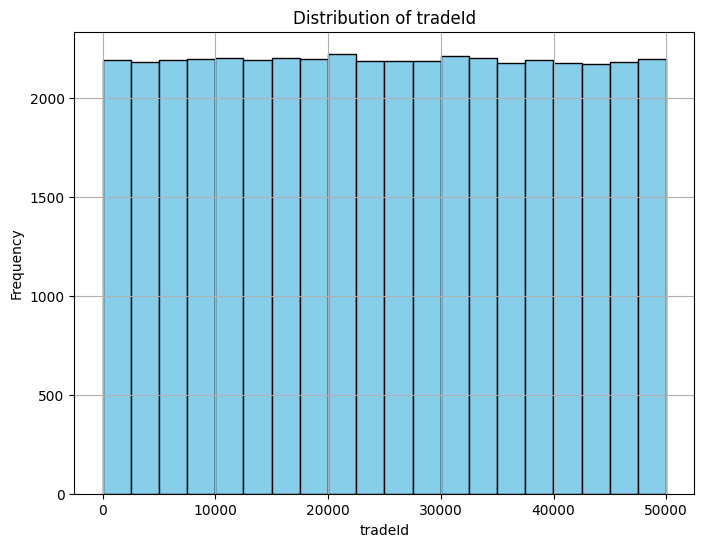

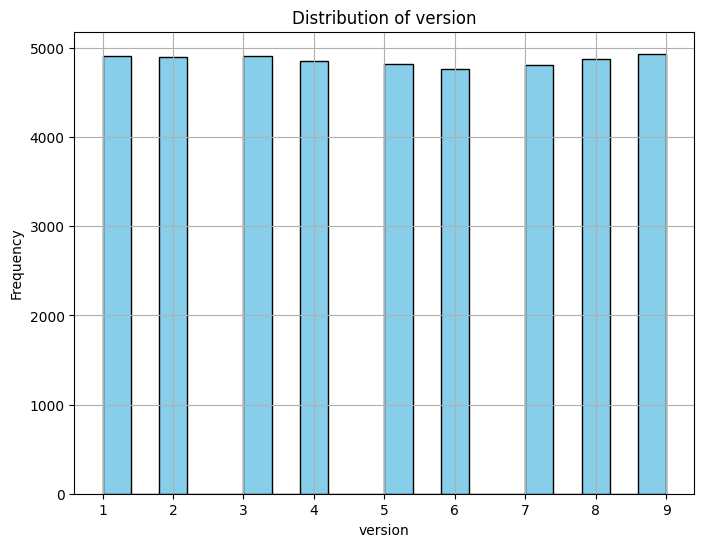

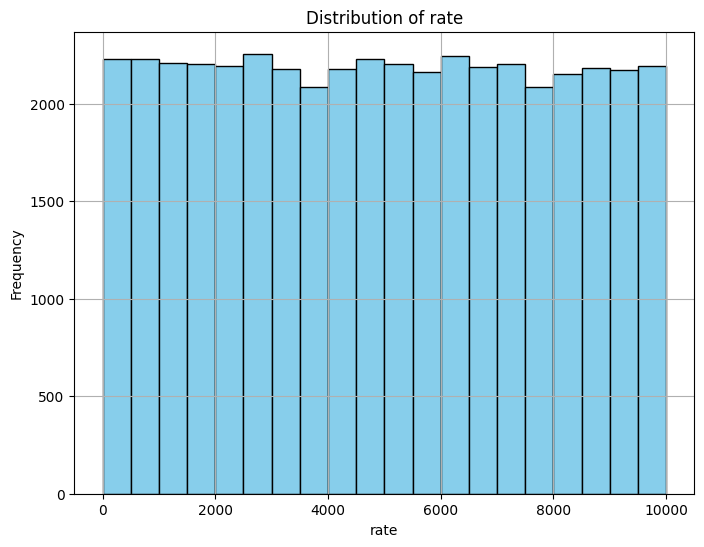

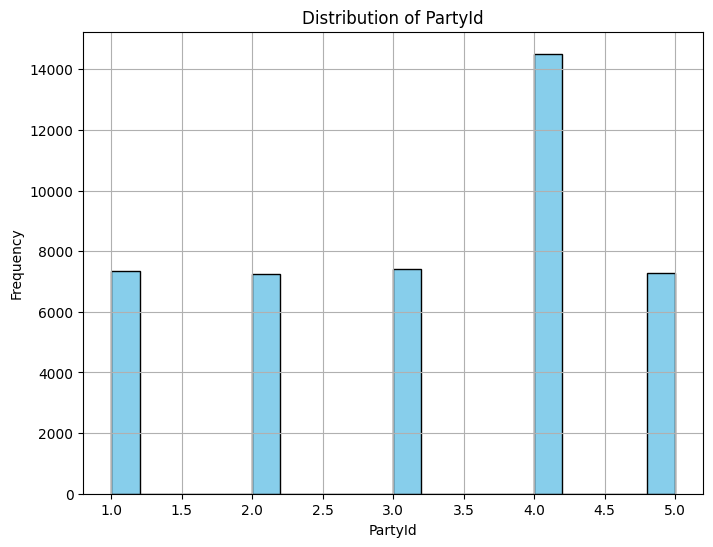

In [193]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [ ]:
#converting "clDateTime", "cDateTime", "expirationDate", "Timestamp", "endDate", and "terminationDate"
#to datetime data type using the pd.to_datetime()
#converting led to errors
#date_columns = ['clDateTime', 'cDateTime', 'expirationDate', 'Timestamp', 'endDate', 'terminationDate']
#for col in date_columns:
#    df[col + '_converted'] = pd.to_datetime(df[col], errors='coerce')

# Find rows with problematic datetime values
#problematic_rows = df[df[date_columns].isnull().any(axis=1)]

# Display the problematic rows
#print("Rows with problematic datetime values:")
#print(problematic_rows)

check the entire DataFrame for outliers

In [ ]:
# Iterate over numerical columns to check for outliers
for column in numerical_columns:
    # Calculate z-scores
    z_scores = (df[column] - df[column].mean()) / df[column].std()

    # Define threshold z-score > 3 or < -3
    threshold = 3

    # Find outliers based on z-score
    outliers = df[abs(z_scores) > threshold]

    # Print column name and rows with outliers
    print("Outliers in column '{}':".format(column))
    print(outliers)

In [ ]:
df.nunique()

In [ ]:
print(df.isnull().sum())

In [ ]:
# Loop through numerical columns and create visualizations
for column in numerical_columns:
    # Create histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

    # Create box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
    plt.xlabel(column)
    plt.show()

asking few questions
* date with most failed trasactions with reporting status

In [212]:
# Filter data for 'ACKNOWLEDGED' reporting status
acknowledged_transactions = df[df['Reporting Status'] == 'ACKNOWLEDGED']
# Count occurrences of each date
acknowledged_transactions_by_date = acknowledged_transactions['clDateTime'].dt.date.value_counts()

print("Date with the most ACKNOWLEDGED transactions:", acknowledged_transactions_by_date.idxmax())
print("Number of ACKNOWLEDGED transactions on this date:", acknowledged_transactions_by_date.max())

Date with the most ACKNOWLEDGED transactions: 2023-07-30
Number of ACKNOWLEDGED transactions on this date: 25


# continue with EDA
data cleaning done with standardisation, handling missing values by dropping values of terminationDate and price column due to excessesive empty data

In [214]:
df.describe()

,tradeId,version,rate,PartyId
count,43791.000000,43791.000000,43791.000000,43791.000000
mean,24979.522231,4.994337,4979.449255,3.162157
std,14422.869703,2.591300,2890.625860,1.343576
min,1.000000,1.000000,0.630700,1.000000
25%,12495.500000,3.000000,2473.493700,2.000000
50%,24953.000000,5.000000,4976.305100,3.000000
75%,37455.500000,7.000000,7468.071950,4.000000
max,49999.000000,9.000000,9999.865100,5.000000


In [215]:
# Frequency distribution of categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(column)
    print(df[column].value_counts())
    print()

cflag
FULLY               14622
ONEWAY              14585
UNCOLLATERALIZED    14584
Name: cflag, dtype: int64

method
NONELECTRONIC    12762
ELECTRONIC       11130
NOTCONFIRMED     10776
NN-ELECTRONIC     9123
Name: method, dtype: int64

eventT
TERMINATION        5005
TRADE              4941
EXERCISE           4906
AMENDMENT          4872
PARTIALEXERCISE    4863
ERROR              4814
NOVATIONTRADE      4813
COMPRESSION        4797
NOVATION           4780
Name: eventT, dtype: int64

mType
SNAPSHOT    21951
REALTIME    21840
Name: mType, dtype: int64

seller
PARTY2    22058
PARTY1    21733
Name: seller, dtype: int64

sType
PHYSICAL    21933
CASH        21858
Name: sType, dtype: int64

Product
SWAP       36538
FORWARD     3531
OPTION      2856
CASH         866
Name: Product, dtype: int64

party
PARTYX    14512
PARTYL     7417
PARTYZ     7344
PARTYY     7265
PARTYK     7253
Name: party, dtype: int64

transactionType
TRADE    25488
EXIT     18303
Name: transactionType, dtype: int64

Repor

<ipython-input-216-05f2f09e33fc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


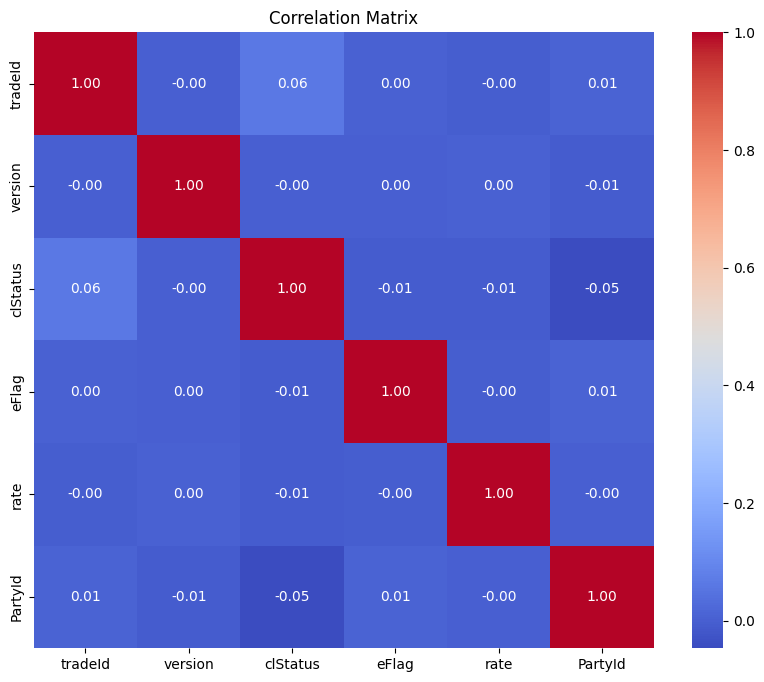

In [216]:
# Compute pairwise correlation
correlation_matrix = df.corr()

# Visualize correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [217]:
# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
           tradeId   version  clStatus     eFlag      rate   PartyId
tradeId   1.000000 -0.000376  0.063366  0.003022 -0.002088  0.007981
version  -0.000376  1.000000 -0.001173  0.000336  0.004245 -0.009614
clStatus  0.063366 -0.001173  1.000000 -0.005795 -0.008206 -0.046435
eFlag     0.003022  0.000336 -0.005795  1.000000 -0.002711  0.009110
rate     -0.002088  0.004245 -0.008206 -0.002711  1.000000 -0.000908
PartyId   0.007981 -0.009614 -0.046435  0.009110 -0.000908  1.000000


In [218]:
unique_values = df[['version','eventT', 'clStatus', 'eFlag','method','cflag','mType','seller','sType','Product','party','PartyId','transactionType','Reporting Status']].apply(lambda x: x.unique())
print(unique_values)

version                                   [1, 9, 8, 3, 2, 6, 7, 4, 5]
eventT              [ERROR, NOVATIONTRADE, EXERCISE, TRADE, AMENDM...
clStatus                                                [True, False]
eFlag                                                   [False, True]
method              [NONELECTRONIC, NOTCONFIRMED, ELECTRONIC, NN-E...
cflag                               [FULLY, ONEWAY, UNCOLLATERALIZED]
mType                                            [REALTIME, SNAPSHOT]
seller                                               [PARTY1, PARTY2]
sType                                                [CASH, PHYSICAL]
Product                                 [SWAP, FORWARD, CASH, OPTION]
party                        [PARTYZ, PARTYX, PARTYK, PARTYY, PARTYL]
PartyId                                               [1, 4, 2, 5, 3]
transactionType                                         [EXIT, TRADE]
Reporting Status    [FAILED ACK, ACK, PROCESSING ERROR, ACKNOWLEDG...
dtype: object


<ipython-input-220-dbd35932408b>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = encoded_df.corr()


                                          tradeId   version  clStatus  \
tradeId                                  1.000000 -0.000376  0.063366   
version                                 -0.000376  1.000000 -0.001173   
clStatus                                 0.063366 -0.001173  1.000000   
eFlag                                    0.003022  0.000336 -0.005795   
rate                                    -0.002088  0.004245 -0.008206   
PartyId                                  0.007981 -0.009614 -0.046435   
cflag_FULLY                             -0.007636 -0.004806 -0.002721   
cflag_ONEWAY                            -0.000722 -0.000774  0.008912   
cflag_UNCOLLATERALIZED                   0.008363  0.005583 -0.006189   
method_ELECTRONIC                       -0.013834 -0.003724 -0.001571   
method_NN-ELECTRONIC                     0.002807  0.005548  0.012079   
method_NONELECTRONIC                     0.006686 -0.002923 -0.000961   
method_NOTCONFIRMED                      0.004282  

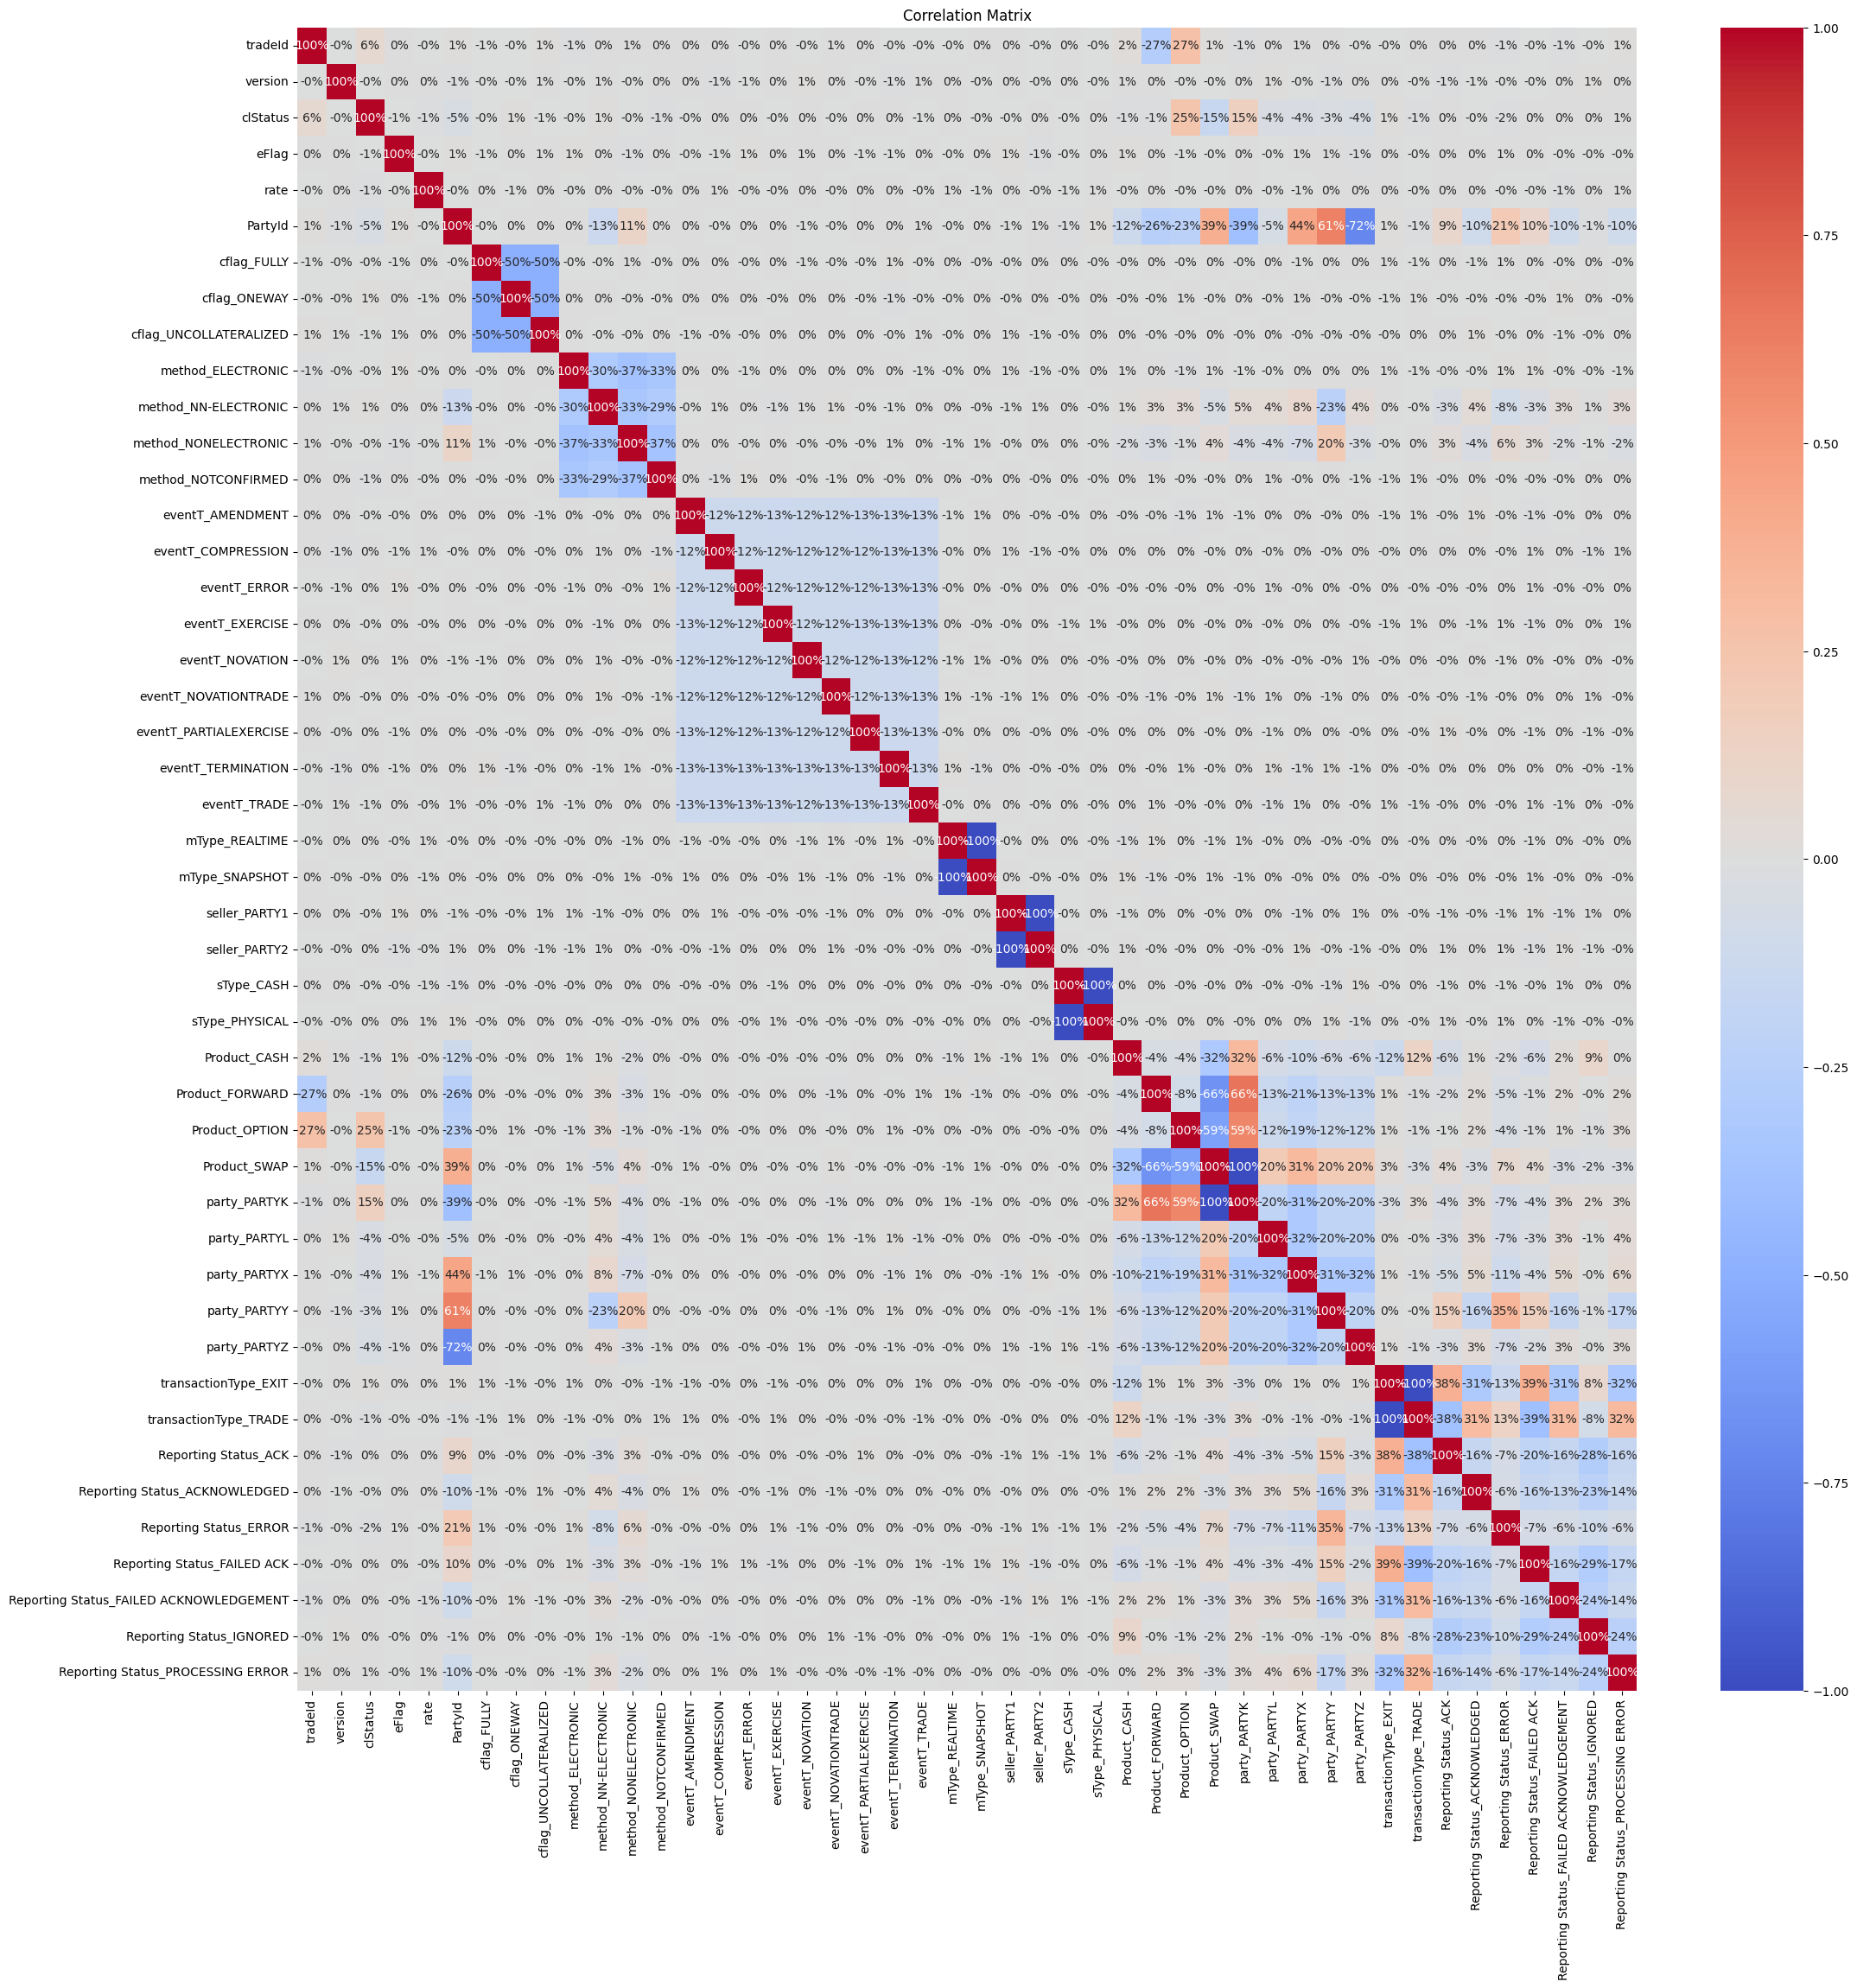

In [220]:
#One-hot encode categorical variables
encoded_df = pd.get_dummies(df)

# Compute correlation matrix
correlation_matrix = encoded_df.corr()

# Display correlation matrix
print(correlation_matrix)
# Visualize correlation matrix using heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".0%", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

Strong Positive Correlations

*   partyYK - product_forward 66%
*   partyYK - product_option 59%
*   partyID - partyYY 61%
*   partyID - partyYX 44%
*   partyID - product_swap 39%

Strong Negative Correlations

*   Transaction_TRADE -Transaction_EXIT -100%
*   Mtype_snapshot - mtype_realtime -100%
*   sType_physical - sType_cash -100%
*   Product_swap - partyYK -100%
*   partyID - partyYZ  -72%
*   partyID - partyYK  -39%
*   partyID - product_option  -23%
*   partyID - product_FORWARD  -26%
*   Product_swap - product forward -66%
*   Product_swap - product_options -59%
*   Transaction_TRADE -Reportingstatus ACK  -38%
*   Transaction_TRADE -Reportingstatus failedACK -39%

Weak positive Correlations

*   partyID - reportingstatus_Failed ACK 10%
*   partyID - reportingstatus_error  21%

Weak negative Correlations

*   partyID - reportingstatus_processing error  -10%
*   partyID - reportingstatus_ACK  -10%

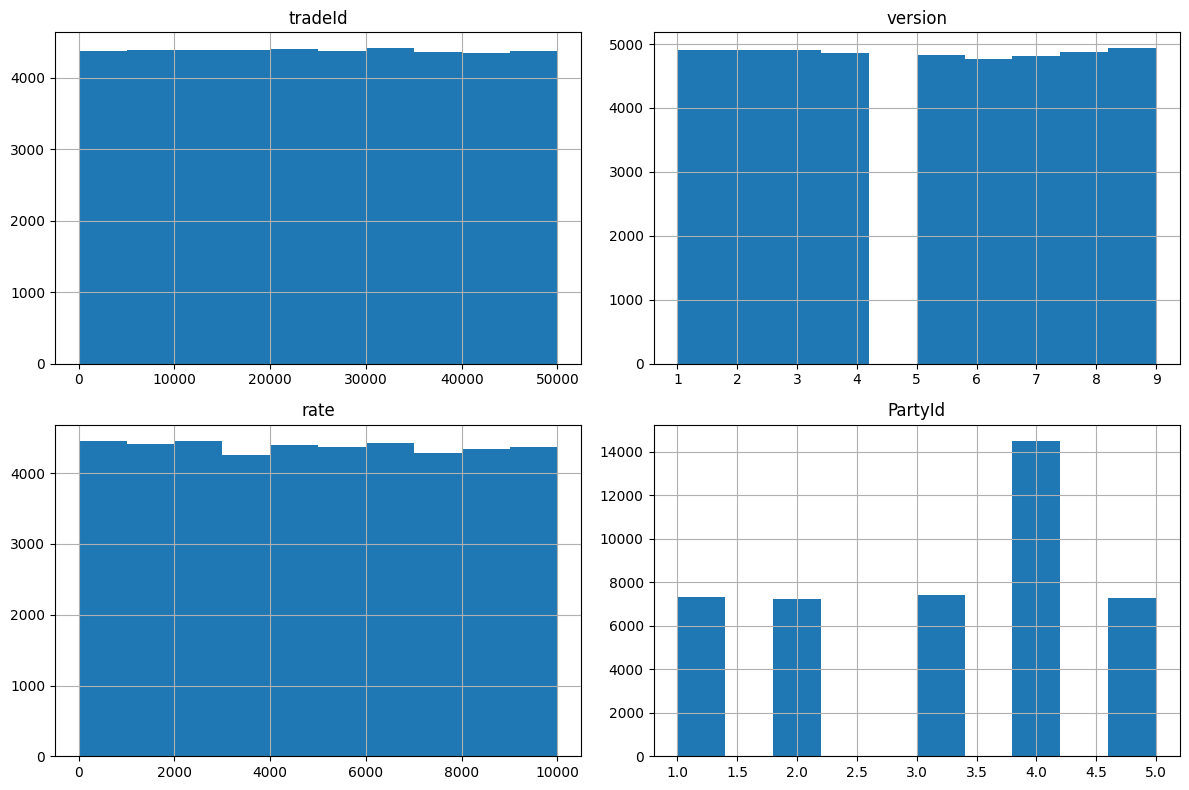

In [221]:
# Plot histograms for numerical features
numerical_features = ['tradeId', 'version', 'clStatus', 'rate', 'PartyId']
df[numerical_features].hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

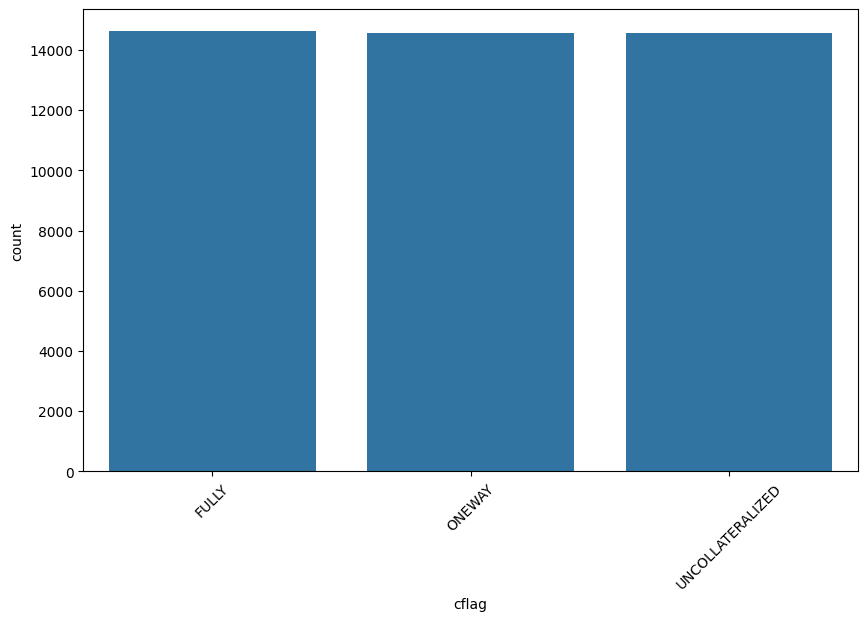

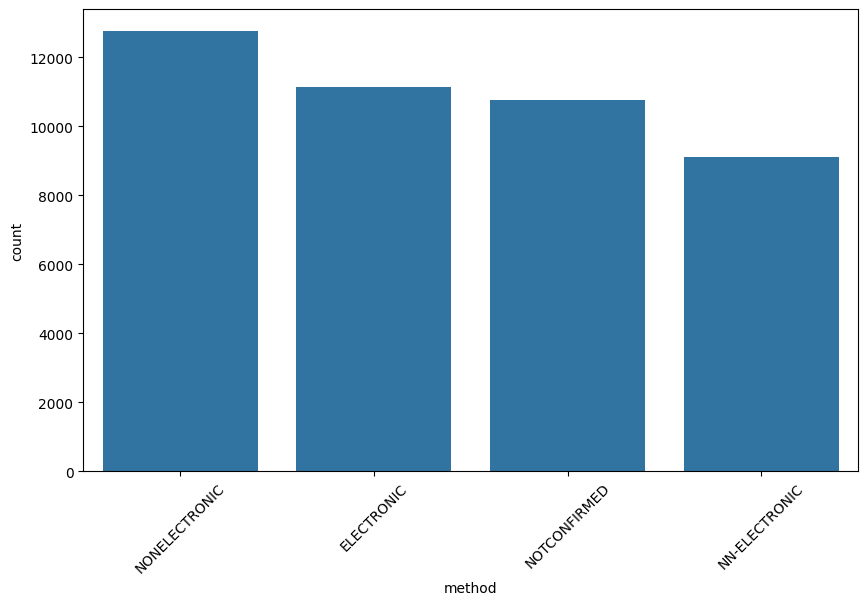

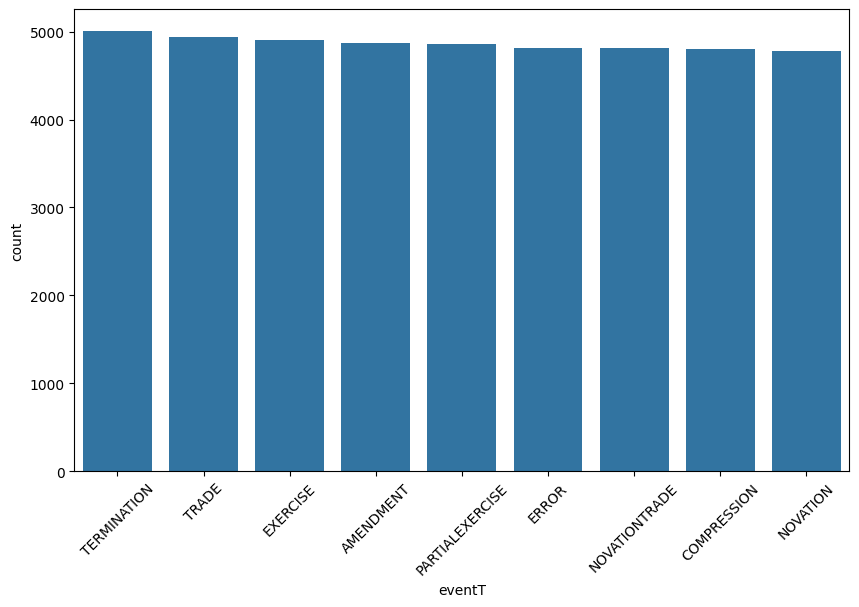

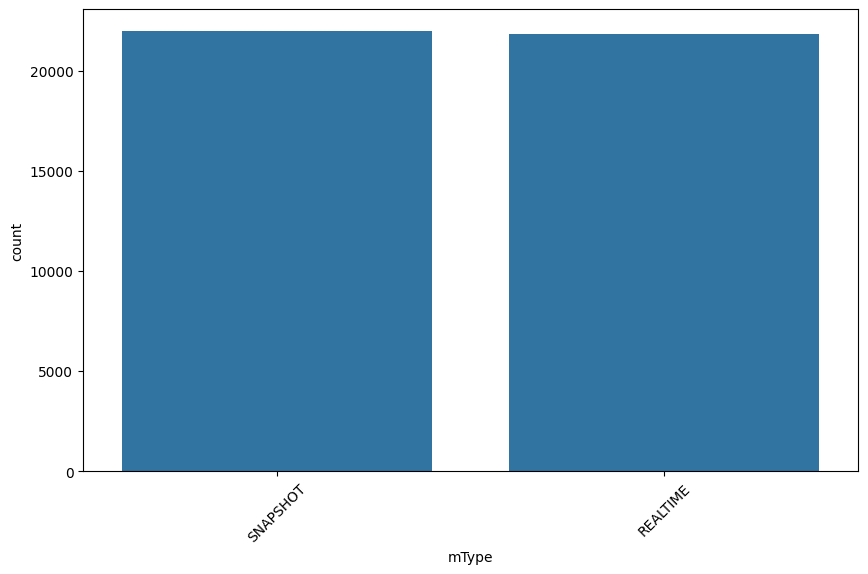

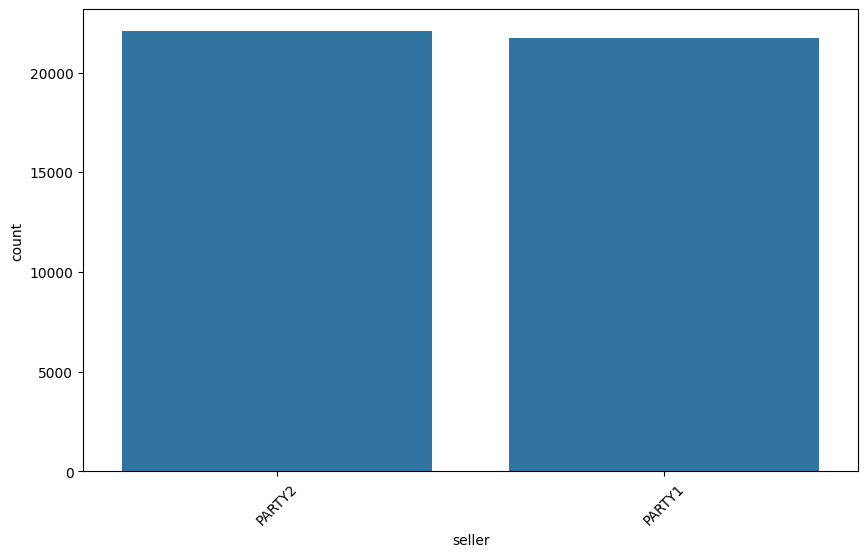

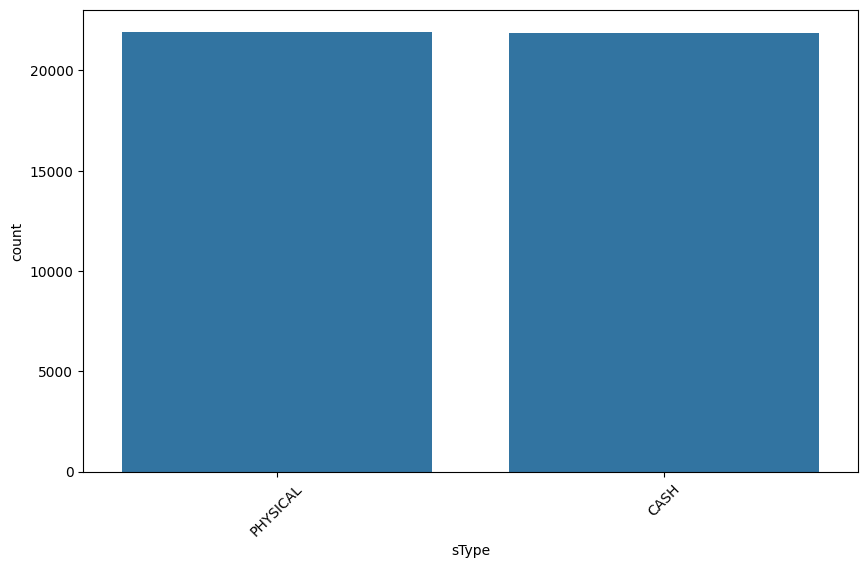

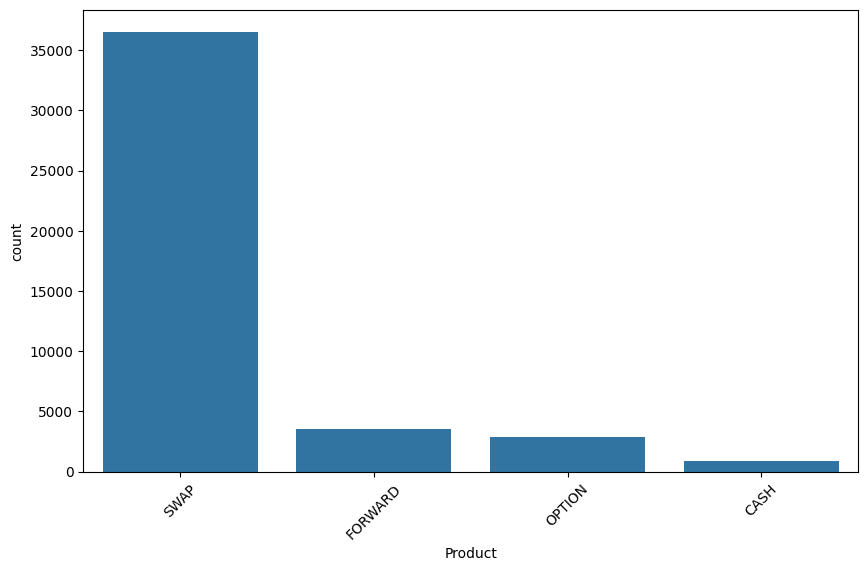

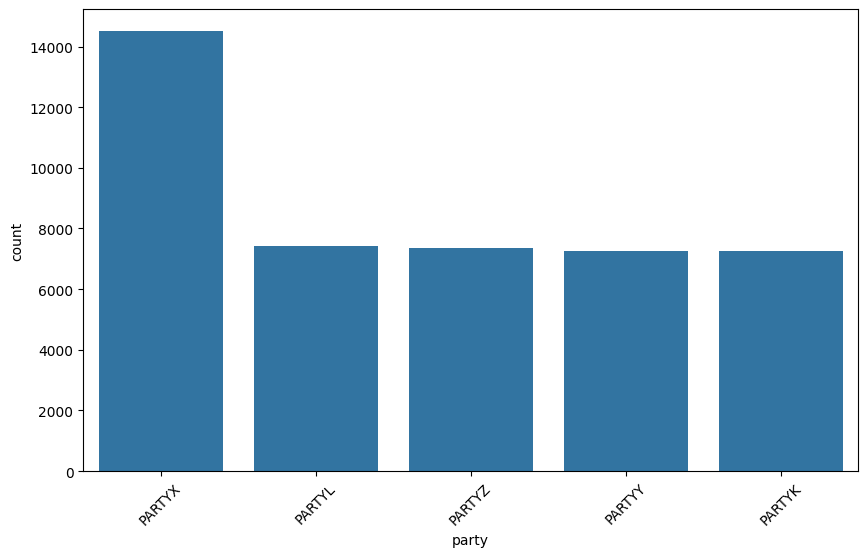

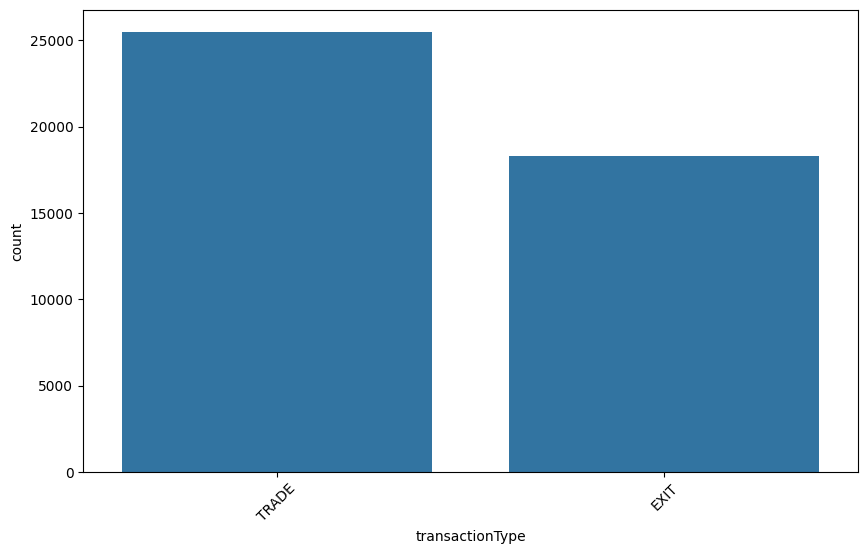

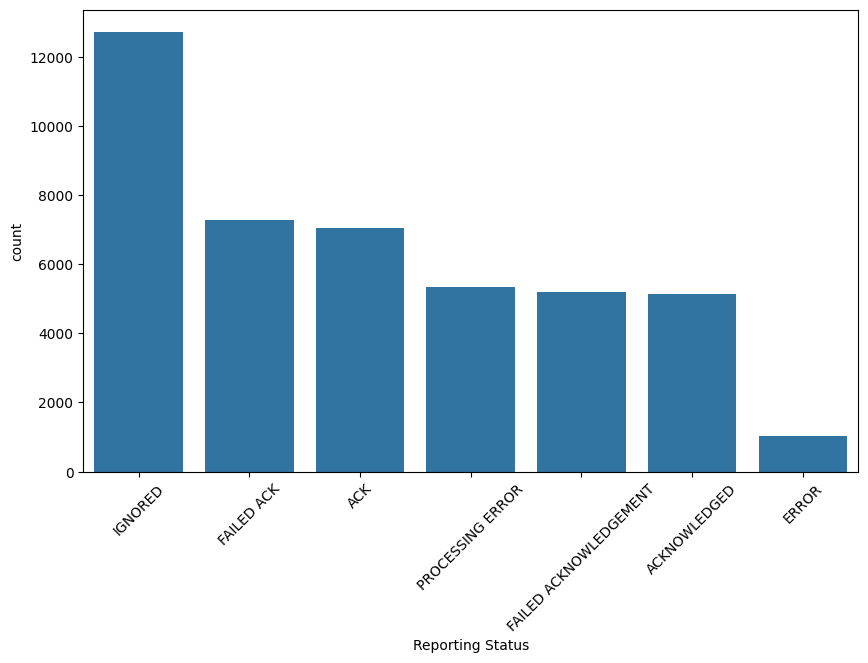

In [222]:
# Plot bar plots for categorical features
categorical_features = ['cflag', 'method', 'eventT', 'mType', 'seller', 'sType', 'Product', 'party', 'transactionType', 'Reporting Status']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

Reporting Status_ACK:

* Strong positive correlations with transactionType_EXIT (0.382) and party_PARTYY (0.154).
Strong negative correlations with Reporting Status_ACKNOWLEDGED (-0.160) and Reporting Status_IGNORED (-0.280).

Reporting Status_FAILED ACK:

* Strong positive correlations with transactionType_EXIT (0.390) and moderate positive correlation with party_PARTYX (0.154).
Strong negative correlations with Reporting Status_ACK (-0.196), Reporting Status_ACKNOWLEDGED (-0.164), and Reporting Status_IGNORED (-0.286).

Reporting Status_PROCESSING ERROR:

* Strong positive correlations with transactionType_TRADE (0.316) and moderate positive correlation with party_PARTYX (0.057).
Strong negative correlations with transactionType_EXIT (-0.316) and party_PARTYY (-0.166).
Moderate positive correlations with Product_OPTION (0.027) and party_PARTYZ (0.027).
Moderate negative correlation with Reporting Status_IGNORED (-0.239).

In [224]:
from scipy.stats import chi2_contingency

# Define your target variable and other categorical variables
target_variable = 'Reporting Status'
categorical_variables = ['cflag', 'method', 'mType', 'seller', 'sType', 'Product', 'party', 'transactionType']

# Perform chi-square test for each categorical variable
for cat_var in categorical_variables:
    contingency_table = pd.crosstab(df[cat_var], df[target_variable])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)

    # Print the results
    print(f"Chi-square test results for {cat_var}:")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p_value}")
    if p_value < 0.05:
        print("The relationship is significant.\n")
    else:
        print("The relationship not significant.\n")

Chi-square test results for cflag:
Chi-square statistic: 9.45604687129272
P-value: 0.6635629646601964
The relationship not significant.

Chi-square test results for method:
Chi-square statistic: 620.3586627431874
P-value: 4.2610890770526155e-120
The relationship is significant.

Chi-square test results for mType:
Chi-square statistic: 3.2891967724597415
P-value: 0.7717715149570591
The relationship not significant.

Chi-square test results for seller:
Chi-square statistic: 10.303788675337874
P-value: 0.11242809087915955
The relationship not significant.

Chi-square test results for sType:
Chi-square statistic: 4.998674251273238
P-value: 0.5439831647799691
The relationship not significant.

Chi-square test results for Product:
Chi-square statistic: 882.6392542373658
P-value: 7.902291914906922e-176
The relationship is significant.

Chi-square test results for party:
Chi-square statistic: 9997.286515703077
P-value: 0.0
The relationship is significant.

Chi-square test results for transacti

In [225]:
from itertools import combinations
# Get all pairs of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
pairs = list(combinations(categorical_columns, 2))

# Perform chi-square test for each pair
for pair in pairs:
    contingency_table = pd.crosstab(df[pair[0]], df[pair[1]])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test for {pair}:")
    print("Chi-square statistic:", chi2)
    print("p-value:", p)
    print()

Chi-square test for ('cflag', 'method'):
Chi-square statistic: 2.527324648833868
p-value: 0.8653971552835493

Chi-square test for ('cflag', 'eventT'):
Chi-square statistic: 11.713169959195513
p-value: 0.7634775232673449

Chi-square test for ('cflag', 'mType'):
Chi-square statistic: 0.548133267975557
p-value: 0.7602814129906048

Chi-square test for ('cflag', 'seller'):
Chi-square statistic: 2.213109768601926
p-value: 0.3306962878119515

Chi-square test for ('cflag', 'sType'):
Chi-square statistic: 0.04302406000683478
p-value: 0.9787177034210099

Chi-square test for ('cflag', 'Product'):
Chi-square statistic: 2.344547063973737
p-value: 0.8854435585325897

Chi-square test for ('cflag', 'party'):
Chi-square statistic: 3.5291379237465654
p-value: 0.8969165277355677

Chi-square test for ('cflag', 'transactionType'):
Chi-square statistic: 2.6863741818188727
p-value: 0.26101247107368813

Chi-square test for ('cflag', 'Reporting Status'):
Chi-square statistic: 9.45604687129272
p-value: 0.663562

* For 'cflag', 'method', 'mType', 'seller', and
'sType', the p-values are all greater than 0.05. no statistically significant relationship between these variables and the target variable 'Reporting Status'.

* For 'Product', 'party', and 'transactionType', the p-values are all less than 0.05. statistically significant relationship between these variables and the target variable 'Reporting Status'.

* 'Product', 'party', and 'transactionType' may be important predictors of the 'Reporting Status
' variable
* 'Method' and 'party' seem significant to explore

Selected relevant categorical features for classification, considering the target variable ('Reporting Status') -
'Product', 'party', and 'transactionType'

In [226]:
relevant_categorical_features = ['Product', 'party', 'transactionType']

# One-hot encode the relevant categorical features
encoded_df = pd.get_dummies(df, columns=relevant_categorical_features)

# Display the encoded DataFrame
print(encoded_df.head())

   tradeId  version                       clDateTime  clStatus   cflag  eFlag  \
0        1        1 2023-07-18 11:47:26.075000+00:00      True   FULLY  False   
1        2        9 2023-08-02 03:12:48.207000+00:00     False   FULLY  False   
2        3        8 2023-05-09 07:42:36.475000+00:00     False   FULLY  False   
3        4        1 2023-10-01 05:02:54.209000+00:00     False   FULLY   True   
4        5        1 2023-01-23 20:53:01.076000+00:00      True  ONEWAY  False   

                         cDateTime         method       rate  \
0 2023-12-10 07:37:58.548000+00:00  NONELECTRONIC  3204.6267   
1 2023-10-03 22:32:10.991000+00:00   NOTCONFIRMED  1061.6943   
2 2023-03-09 20:32:31.302000+00:00  NONELECTRONIC  9338.9422   
3 2023-11-21 06:53:09.983000+00:00     ELECTRONIC  9303.3931   
4 2023-08-05 17:06:08.895000+00:00     ELECTRONIC  9684.7840   

                    expirationDate  ... Product_FORWARD Product_OPTION  \
0 2023-07-31 17:29:21.745000+00:00  ...               

In [227]:
# Selected categorical features
categorical_features = ['Product', 'party', 'transactionType']

# Iterate over each categorical feature
for feature in categorical_features:
    unique_categories = df[feature].unique()
    print(f"Unique categories in '{feature}': {unique_categories}")

Unique categories in 'Product': ['SWAP' 'FORWARD' 'CASH' 'OPTION']
Unique categories in 'party': ['PARTYZ' 'PARTYX' 'PARTYK' 'PARTYY' 'PARTYL']
Unique categories in 'transactionType': ['EXIT' 'TRADE']


In [231]:
# encoded_df DataFrame containing the encoded categorical features
features = ['Product_SWAP', 'Product_FORWARD', 'Product_OPTION', 'Product_CASH',
            'party_PARTYZ', 'party_PARTYX', 'party_PARTYK', 'party_PARTYY', 'party_PARTYL',
            'transactionType_EXIT', 'transactionType_TRADE']

# K-means clustering
kmeans = KMeans(n_clusters=5)  # 5 clusters for testing
encoded_df['cluster'] = kmeans.fit_predict(encoded_df[features])

# Count number of transactions in each cluster
cluster_counts = encoded_df['cluster'].value_counts()

print("Number of transactions in each cluster:")
print(cluster_counts)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of transactions in each cluster:
3    12546
0     9231
4     7417
1     7344
2     7253
Name: cluster, dtype: int64


as we've to find groups of similar transaction using DBScAN

In [232]:
from sklearn.cluster import DBSCAN
# Initialize DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed

# Fit DBSCAN model to the data
encoded_df['cluster'] = dbscan.fit_predict(encoded_df[features])

# Count number of transactions in each cluster
cluster_counts = encoded_df['cluster'].value_counts()

print("Number of transactions in each cluster:")
print(cluster_counts)

Number of transactions in each cluster:
2     8351
1     6161
6     4285
8     4205
7     4195
0     3139
5     3132
4     3070
3     1987
11    1599
9     1544
12    1257
10     866
Name: cluster, dtype: int64


getting 12 clusters
further exploring patterns and features for these clusters

In [235]:
# Iterate over each cluster
for cluster_label in encoded_df['cluster'].unique():
    # Extract transactions
    cluster_data = encoded_df[encoded_df['cluster'] == cluster_label]
    print("Cluster:", cluster_label)

    # Analyze numerical features
    #print("Numerical Feature Distributions:")
    #print(cluster_data.describe())

    # Analyze categorical features
    print("Categorical Feature Distributions:")
    for feature in ['Product_SWAP', 'Product_FORWARD', 'Product_OPTION', 'Product_CASH',
                    'party_PARTYZ', 'party_PARTYX', 'party_PARTYK', 'party_PARTYY', 'party_PARTYL',
                    'transactionType_EXIT', 'transactionType_TRADE']:
        print("Feature:", feature)
        print(cluster_data[feature].value_counts())
        print()

Cluster: 0
Categorical Feature Distributions:
Feature: Product_SWAP
1    3139
Name: Product_SWAP, dtype: int64

Feature: Product_FORWARD
0    3139
Name: Product_FORWARD, dtype: int64

Feature: Product_OPTION
0    3139
Name: Product_OPTION, dtype: int64

Feature: Product_CASH
0    3139
Name: Product_CASH, dtype: int64

Feature: party_PARTYZ
1    3139
Name: party_PARTYZ, dtype: int64

Feature: party_PARTYX
0    3139
Name: party_PARTYX, dtype: int64

Feature: party_PARTYK
0    3139
Name: party_PARTYK, dtype: int64

Feature: party_PARTYY
0    3139
Name: party_PARTYY, dtype: int64

Feature: party_PARTYL
0    3139
Name: party_PARTYL, dtype: int64

Feature: transactionType_EXIT
1    3139
Name: transactionType_EXIT, dtype: int64

Feature: transactionType_TRADE
0    3139
Name: transactionType_TRADE, dtype: int64

Cluster: 1
Categorical Feature Distributions:
Feature: Product_SWAP
1    6161
Name: Product_SWAP, dtype: int64

Feature: Product_FORWARD
0    6161
Name: Product_FORWARD, dtype: int64

